<a href="https://colab.research.google.com/github/AntonioZN23/Challenge1-AluraStore/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [4]:
import pandas as pd
from matplotlib import pyplot as plt

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



La tienda que más vendió fue la tienda 1 con un total de $1,150,880,400.00
La tienda que menos vendió fue la tienda 4 con un total de $1,038,375,700.00



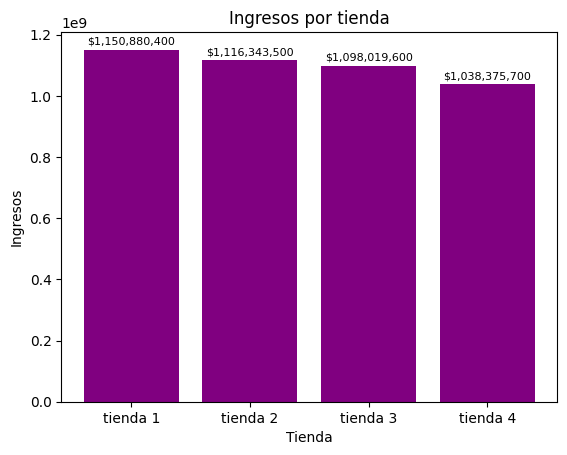

In [5]:
ingresos = {'tienda 1':float(tienda['Precio'].sum()),
'tienda 2':float(tienda2['Precio'].sum()),
'tienda 3':float(tienda3['Precio'].sum()),
'tienda 4':float(tienda4['Precio'].sum())}

#print(ingresos)

nombre,valor = ingresos.keys(),ingresos.values()
mayor_ganancia = []
menor_ganancia = []
max_ingresos = 0
min_ingresos = 9999999999999
for i in valor:
  if i >= max_ingresos:
    max_ingresos = i
  if i <= min_ingresos:
    min_ingresos = i
    tiendaMin = nombre

for j in ingresos.keys():
      if ingresos[j] == max_ingresos:
        mayor_ganancia.append(j)
      if ingresos[j] == min_ingresos:
        menor_ganancia.append(j)

print("La tienda que más vendió fue la", ", ".join(mayor_ganancia), f"con un total de ${max_ingresos:,.2f}")
print("La tienda que menos vendió fue la", ", ".join(menor_ganancia), f"con un total de ${min_ingresos:,.2f}\n")

fig, ax = plt.subplots()
bars = ax.bar(ingresos.keys(), ingresos.values(), color='purple')

for bar in bars:
    altura = bar.get_height()
    texto = f"${altura:,.0f}"
    ax.text(bar.get_x() + bar.get_width()/2,altura + (altura * 0.01), texto, ha='center', va='bottom', fontsize=8)

plt.title('Ingresos por tienda')
plt.xlabel('Tienda')
plt.ylabel('Ingresos')
plt.show()


La Tienda 1 tuvo las siguientes ganancias por año: 
2020 | 368,933,200.00
2021 | 362,120,800.00
2022 | 316,565,600.00
2023 | 103,260,800.00




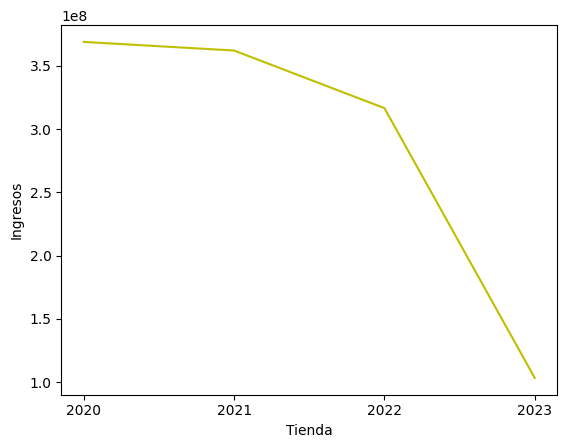


La Tienda 2 tuvo las siguientes ganancias por año: 
2020 | 320,466,600.00
2021 | 351,215,500.00
2022 | 358,226,500.00
2023 | 86,434,900.00




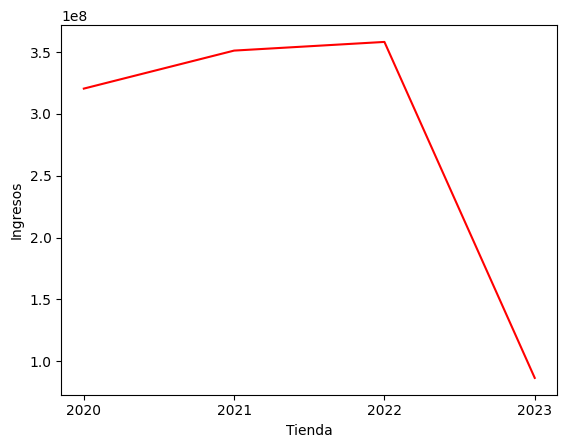


La Tienda 3 tuvo las siguientes ganancias por año: 
2020 | 321,707,500.00
2021 | 362,954,400.00
2022 | 350,438,300.00
2023 | 62,919,400.00




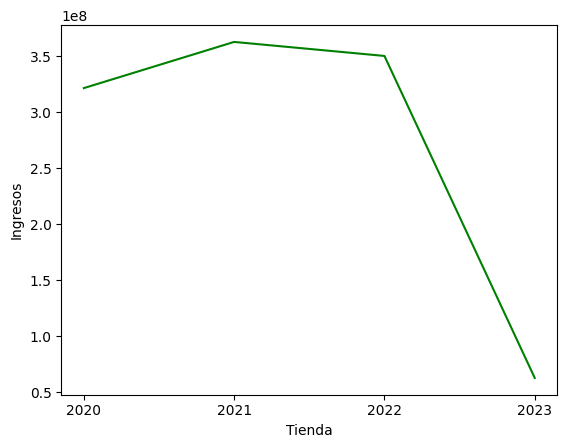


La Tienda 4 tuvo las siguientes ganancias por año: 
2020 | 330,847,700.00
2021 | 347,823,600.00
2022 | 302,221,500.00
2023 | 57,482,900.00




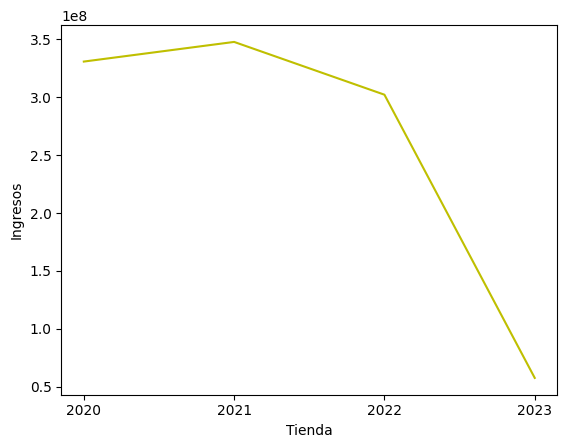

In [6]:
import random

def graficar(x):
  colores = ['r-','b-','g-','y-']
  plt.plot(x.keys(),x.values(),colores[random.randint(0,len(colores)-1)])
  plt.xlabel('Tienda')
  plt.ylabel('Ingresos')
  plt.show()

def ganancia_por_anio(x,nombre):

  fechas = x['Fecha de Compra']
  precios = x['Precio']
  ganancia = {}
  anio = [i[-4:] for i in fechas]
  anio.sort()
  indices_anio = list(set(anio))
  indices_anio.sort()

  for i in indices_anio:
    for j in range(len(fechas)):
      if i == fechas[j][-4:]:
        if i in ganancia:
          ganancia[i] += float(precios[j])
        else:
          ganancia[i] = float(precios[j])

  print(f"\nLa {nombre} tuvo las siguientes ganancias por año: ")
  for i in ganancia:
    print(f"{i} | {ganancia[i]:,.02f}")

  print('\n')
  graficar(ganancia)

ganancia_por_anio(tienda,'Tienda 1')
ganancia_por_anio(tienda2,'Tienda 2')
ganancia_por_anio(tienda3,'Tienda 3')
ganancia_por_anio(tienda4,'Tienda 4')

# 2. Ventas por categoría

In [7]:
def ventas_por_categoria(valores_tienda):
  categorias = {x for x in valores_tienda['Categoría del Producto']}
  ventas_por_categoria = {x:int(valores_tienda['Categoría del Producto'].value_counts()[x]) for x in categorias}

  return ventas_por_categoria

def grafico_pastel(x):
  plt.pie(x[1].values(),labels=x[1].keys(),autopct="%0.1f %%")
  plt.title(f'Categorias mas vendidas por {x[0]}')
  plt.axis("equal")
  plt.show()

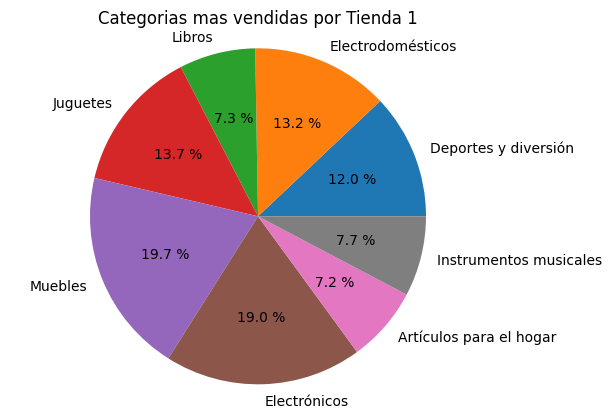

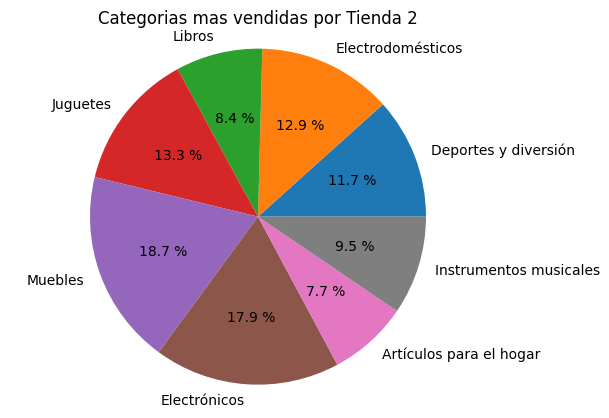

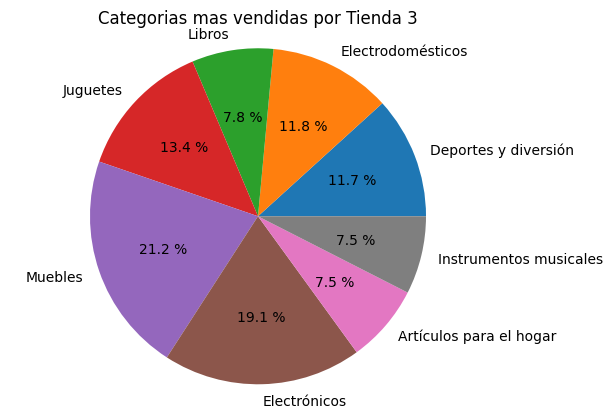

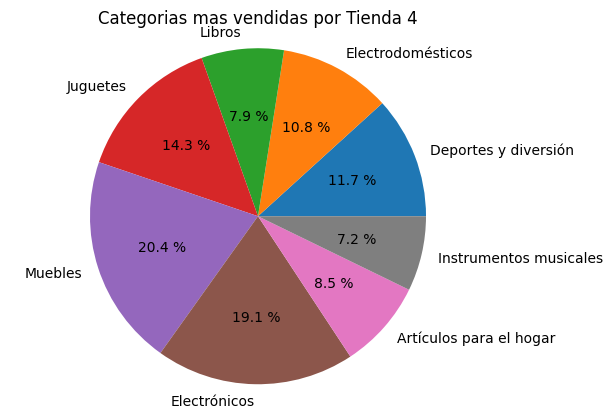

In [8]:
ventas_de_tiendas_por_categoria = []

ventas_de_tiendas_por_categoria.append(('Tienda 1',ventas_por_categoria(tienda)))
ventas_de_tiendas_por_categoria.append(('Tienda 2',ventas_por_categoria(tienda2)))
ventas_de_tiendas_por_categoria.append(('Tienda 3',ventas_por_categoria(tienda3)))
ventas_de_tiendas_por_categoria.append(('Tienda 4',ventas_por_categoria(tienda4)))

for i in range(len(ventas_de_tiendas_por_categoria)):
  grafico_pastel(ventas_de_tiendas_por_categoria[i])
  print('\n\n')

# 3. Calificación promedio de la tienda


La calificación obtenida por tienda:

Tienda 1 | 3.98
Tienda 2 | 4.04
Tienda 3 | 4.05
Tienda 4 | 4.0




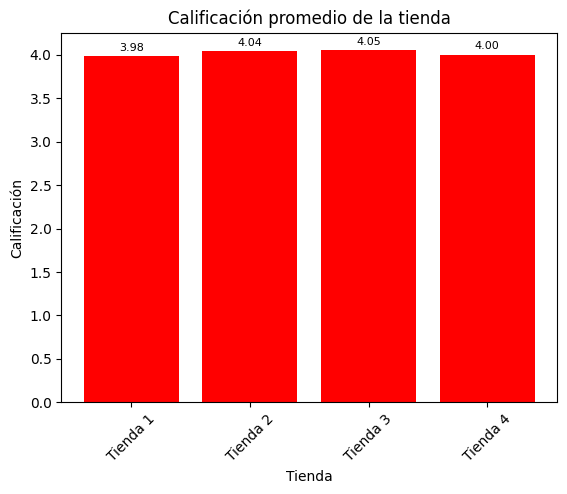

In [9]:
calificacion_promedio = {'Tienda 1':round(float(tienda['Calificación'].mean()),2),
'Tienda 2':round(float(tienda2['Calificación'].mean()),2),
'Tienda 3':round(float(tienda3['Calificación'].mean()),2),
'Tienda 4':round(float(tienda4['Calificación'].mean()),2)}

print("La calificación obtenida por tienda:\n")

for i in calificacion_promedio:
  print(f"{i} | {calificacion_promedio[i]}")

print('\n')

fig, ax = plt.subplots()
bars = ax.bar(calificacion_promedio.keys(), calificacion_promedio.values(), color='red')

for bar in bars:
    altura = bar.get_height()
    texto = f"{altura:,.2f}"
    ax.text(bar.get_x() + bar.get_width()/2,altura + (altura * 0.01), texto, ha='center', va='bottom', fontsize=8)

plt.title('Calificación promedio de la tienda')
plt.xlabel('Tienda')
plt.ylabel('Calificación')
plt.xticks(rotation=45)
plt.show()

# 4. Productos más y menos vendidos

In [10]:
def mas_vendidos(x):
  llaves,valores = x.keys(),x.values()
  ordenados = list(valores)
  ordenados.sort()
  ordenados = ordenados[-5:]

  productos = {}
  for i in range(0,5):
    for j in llaves:
      if x[j] == ordenados[i]:
        productos[j]=x[j]
        del x[j]
        break

  return productos

def menos_vendidos(x):
  llaves,valores = x.keys(),x.values()
  ordenados = list(valores)
  ordenados.sort()
  ordenados = ordenados[:5]

  productos = {}
  for i in range(0,5):
    for j in llaves:
      if x[j] == ordenados[i]:
        productos[j]=x[j]
        del x[j]
        break

  return productos

def graficar(y,x,color_deseado,color_deseado2):
  fig, ax = plt.subplots(figsize=(12,6))
  colores = []
  for i in range(len(x)):
    colores.append(color_deseado)
  for i in range(len(y)):
    colores.append(color_deseado2)

  llaves_completas = list(x.keys()) + list(y.keys())
  valores_completos = list(x.values()) + list(y.values())
  bars = ax.bar(llaves_completas, valores_completos, color=colores)

  for bar in bars:
      altura = bar.get_height()
      texto = f"{altura:,.0f} unidades"
      ax.text(bar.get_x() + bar.get_width()/2,altura + (altura * 0.01), texto, ha='center', va='bottom', fontsize=8)

  plt.title('Articulos menos y más vendidos de la tienda')
  plt.xlabel('Artículo')
  plt.ylabel('Total de ventas')
  plt.xticks(rotation=45)
  plt.show()

def top_cinco(y,color_deseado,color_deseado2):
    articulos = {x for x in y['Producto']}
    productos = {x:int(y['Producto'].value_counts()[x]) for x in articulos}

    top5_mas_vendidos=mas_vendidos(productos)
    valores_top5_mas_venidos = [str(num) for num in list(top5_mas_vendidos.values())]
    print(f'Top 5 productos mas vendidos: {", ".join(list(top5_mas_vendidos.keys()))} con un total de ventas de {", ".join(valores_top5_mas_venidos)} unidades respectivamente')

    top5_menos_vendidos=menos_vendidos(productos)
    valores_top5_menos_venidos = [str(num) for num in list(top5_menos_vendidos.values())]
    print(f'Top 5 productos menos vendidos: {", ".join(list(top5_menos_vendidos.keys()))} con un total de ventas de {", ".join(valores_top5_menos_venidos)} unidades respectivamente\n')

    graficar(top5_mas_vendidos,top5_menos_vendidos,color_deseado,color_deseado2)


Tienda 1

Top 5 productos mas vendidos: Bloques de construcción, Secadora de ropa, TV LED UHD 4K, Armario, Microondas con un total de ventas de 56, 58, 60, 60, 60 unidades respectivamente
Top 5 productos menos vendidos: Celular ABXY, Auriculares con micrófono, Olla de presión, Pandereta, Mochila con un total de ventas de 33, 33, 35, 36, 39 unidades respectivamente



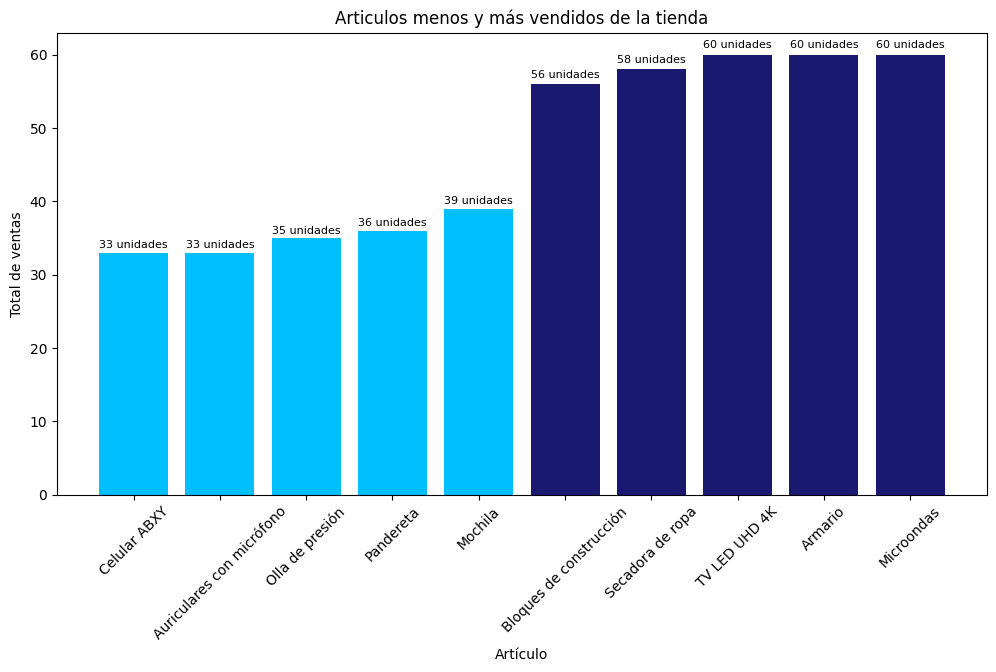


Tienda 2

Top 5 productos mas vendidos: Guitarra acústica, Pandereta, Batería, Microondas, Iniciando en programación con un total de ventas de 58, 58, 61, 62, 65 unidades respectivamente
Top 5 productos menos vendidos: Juego de mesa, Impresora, Mesa de comedor, Sillón, Auriculares con un total de ventas de 32, 34, 34, 35, 37 unidades respectivamente



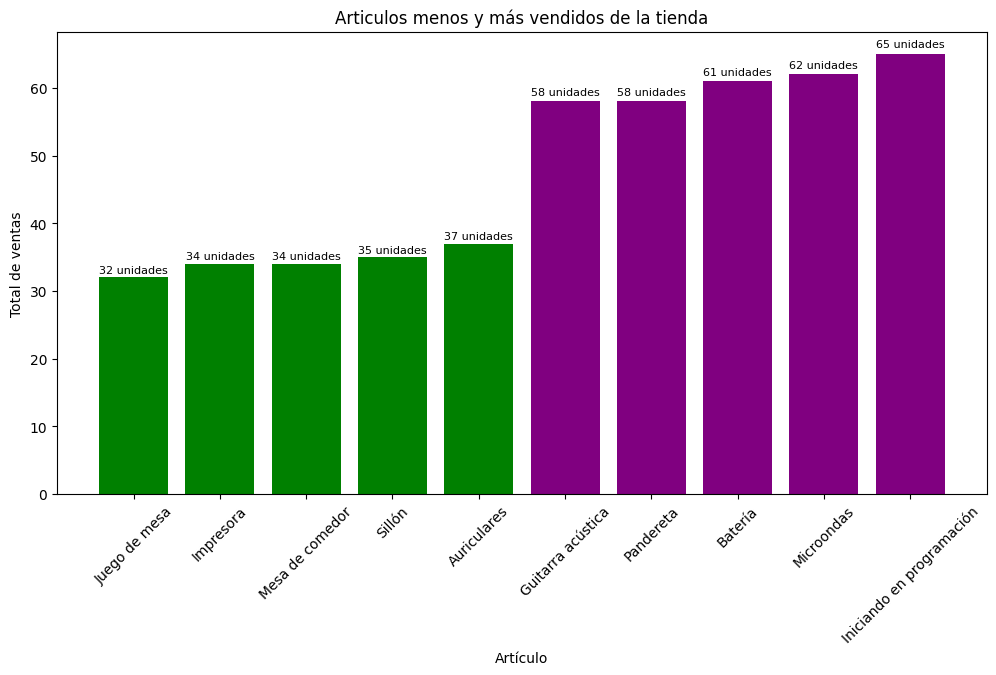


Tienda 3

Top 5 productos mas vendidos: Set de ollas, Mesa de noche, Cama king, Mesa de comedor, Kit de bancas con un total de ventas de 55, 55, 56, 56, 57 unidades respectivamente
Top 5 productos menos vendidos: Bloques de construcción, Mochila, Microondas, Set de vasos, Vaso térmico con un total de ventas de 35, 36, 36, 36, 38 unidades respectivamente



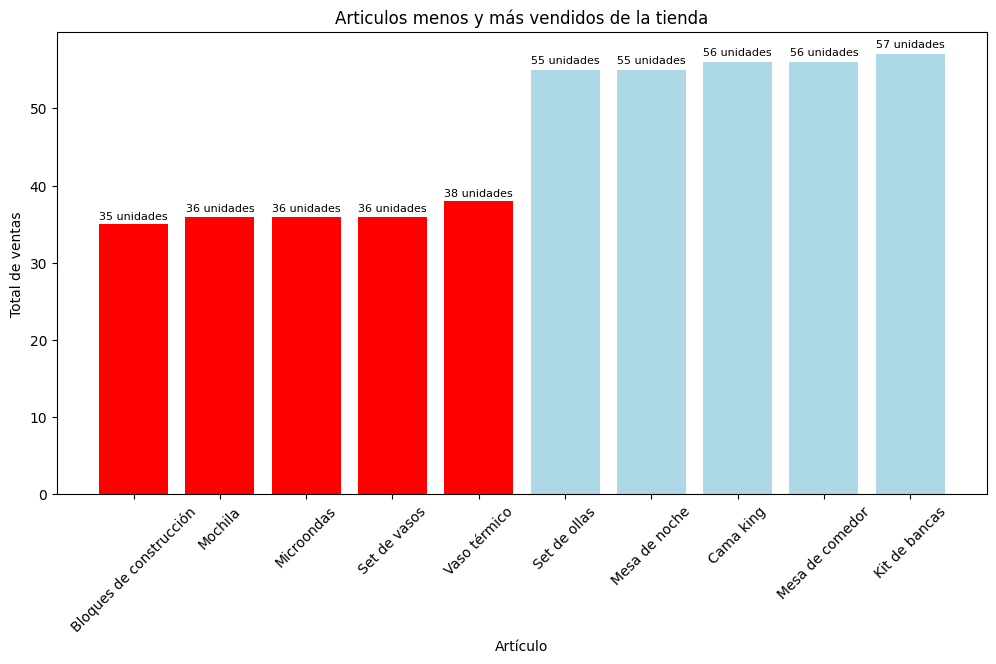


Tienda 4

Top 5 productos mas vendidos: Carrito de control remoto, Dashboards con Power BI, Cama king, Cubertería, Cama box con un total de ventas de 55, 56, 56, 59, 62 unidades respectivamente
Top 5 productos menos vendidos: Guitarra eléctrica, Armario, Guitarra acústica, Refrigerador, Ciencia de datos con Python con un total de ventas de 33, 34, 37, 38, 38 unidades respectivamente



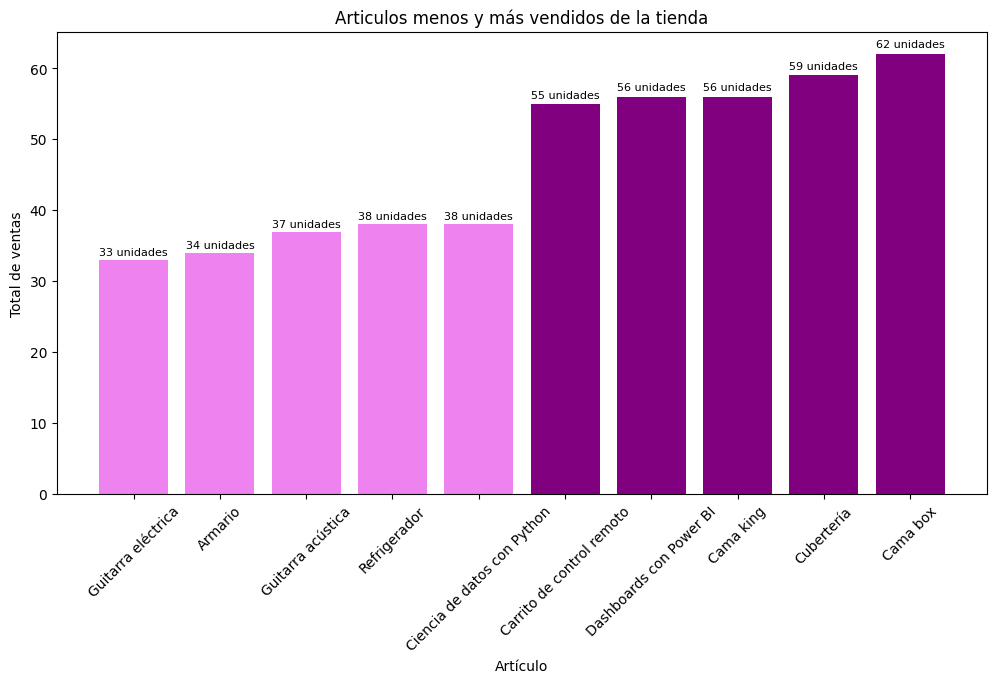

In [11]:
print("\nTienda 1\n")
top_cinco(tienda,'deepskyblue','midnightblue')

print("\nTienda 2\n")
top_cinco(tienda2,'green','purple')

print("\nTienda 3\n")
top_cinco(tienda3,'red','lightblue')

print("\nTienda 4\n")
top_cinco(tienda4,'violet','purple')

# 5. Envío promedio por tienda

El costo promedio de envío por tienda fue: 

Tienda 1 | $26018.61
Tienda 2 | $25216.24
Tienda 3 | $24805.68
Tienda 4 | $23459.46




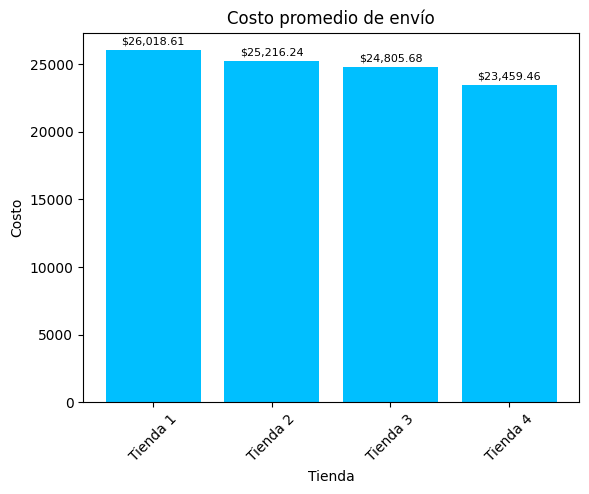

In [13]:
valor_envio_promedio = {'Tienda 1':round(float(tienda['Costo de envío'].mean()),2),
'Tienda 2':round(float(tienda2['Costo de envío'].mean()),2),
'Tienda 3':round(float(tienda3['Costo de envío'].mean()),2),
'Tienda 4':round(float(tienda4['Costo de envío'].mean()),2)}

print("El costo promedio de envío por tienda fue: \n")
for i in valor_envio_promedio.keys():
  print(f"{i} | ${valor_envio_promedio[i]}")

print('\n')

fig, ax = plt.subplots()
bars = ax.bar(valor_envio_promedio.keys(), valor_envio_promedio.values(), color='deepskyblue')

for bar in bars:
    altura = bar.get_height()
    texto = f"${altura:,.2f}"
    ax.text(bar.get_x() + bar.get_width()/2,altura + (altura * 0.01), texto, ha='center', va='bottom', fontsize=8)

plt.title('Costo promedio de envío')
plt.xlabel('Tienda')
plt.ylabel('Costo')
plt.xticks(rotation=45)
plt.show()

# 6. Análisis de métricas

Para poder realizar una decisión sobre qué empresa conviene vender para poder invertir en otro activo, es necesario analizar la información obtenida en los gráficos obtenidos.

En primera insancia, se realizó un gráfico donde se observa que la Tienda 1 es la tienda con mayores ingresos registrados a lo largo del tiempo con un total de 1,150,880,400, seguido por las Tiendas 2 y 3, mientras que la Tienda 4 registra la menor aportación económica con ingresos de 1,038,375,700.

Si bien esta información resulta importante, de igual manera es mantener presente el historial de ganancias de cada tienda por año, pues mediante este historial será posible visualizar si existe crecimiento o decremento en el histórico anual, por lo cual el segundo análisis cuenta con ese enfoque.

En este segundo enfoque, la Tienda 1 presenta un decremento en las ganancias de forma anual, sin embargo, hasta el año 2023 fue la tienda con la mayor ganancia reportada. Por otro lado, la tienda que mantuvo un crecimiento más constante fue la Tienda 2, la cual incrementó sus ingresos entre 2020 y 2022, aunque no reportó ingresos mayores que la Tienda 1 en 2023. La Tienda 3 presentó un fuerte incremento de sus ganacias en 2021 respecto a 2020, pero 2022 presentó un decremento y las ganancias en 2023 resultan inferiores que en las otras dos tiendas. Finalmente, la Tienda 4 presentó una dinámica similar a la Tienda 3 pero con un menor margen de incremento para 2022, además de reportar las menores ganancias para 2023 en comparación a las otras Tiendas.

Se observó que en general la tendencia de las tiendas en cuanto a demanda de productos se centra principalmente en Electrónicos y Muebles, mientras que las categorías con menor demanda son Libros, Artículos para el hogar e Instrumentos musicales, esta tendencia varía según la tienda.

Se realizó un análisis respecto al desempeño de la calificación promedio de los productos de cada tienda y se utilizó como un indicador para determinar la calidad de la misma, en este análisis la tienda con productos mejor evaluados es la Tienda 3 e inmediatamente se encuentra la Tienda 2, con una diferencia de 0.01 de calificación. Por otr lado, los productos de la Tienda 4 reciben un promedio acumulado de 4.00 y la Tienda 1, con la menor calificación, se sostiene con 3.98 de promedio.

Se analizaron los 5 artículos más y menos vendidos por cada tienda, siendo un foco de relevancia que la Tienda 2 cuenta con las tendencias menor y mayo venta de un mismo producto, siendo estos el juego de mesa e Iniciando en programacion respectivamente. Para tomar una decisión más determinista en este campo es necesario realizar un análisis de la ganancia de venta de los productos de mayor y menor de tendencia, pues este sería un gran indicador de el beneficio que estos productos están dejando.

Finalmente, se realizó un análisis sobre el costo de envío promedio por cada tienda, donde se determinó que la tienda con envíos más caros es la Tienda 1, seguido por la Tienda 2 y 3, respectivamente, y con la Tienda 4 siendo la de menor costo promedio de envío.

#7. Resultados

Finalmente, el análisis previo demuestra que la tienda a vender deberá ser la Tienda 4 si el Sr. Juan no desea realizar un mantenimiento tan agresivo a las tiendas que mantendrá, y deberá vender la Tienda 1 si apuesta a la tendencia oportunidad de crecimiento que tiene la Tienda 4.

Para explicar a mayor profundidad la resolución presentada anteriormente, se expondrán los puntos a favor y encontra de cada tienda.

Antes de exponer los puntos, se menciona que las Tiendas 2 y 3 quedane exentas del siguiente análisis debido a que presentaron una mejor tendencia de crecimiento y estabilidad en cuanto a precios y productos en comparación a las otras 2 Tiendas.

En el caso de la Tienda 1 se observa que es la tienda que en el historial acumulado presentó la mayor cantidad de ganancia, mientras que en este mismo historial la Tienda 4 fue la de menor desempeño. Sin embargo al analizar el desempeño de ganancias anual de cada Tienda, se observa una tendencia de decremento en las ganancias de la Tienda 1, por lo que, si la tendencia continua igual pronto será superado por las Tiendas 2 y 3 en cuanto a desempeño anual. Por su lado, la Tienda 4 presentó un incremento notable en 2022, por lo cual se podría recuperar la tendencia si se toma una acción correctiva.

En las categorías más vendidas la Tienda 4 cuenta con una mayor presencia en cuanto a los electrónicos y muebles, sin embargo los productos más vendidos por esta tienda tiene poca presencia en electrónicos lo cual presenta un desinterés del público o una área de oportunidad para expandir el negocio, al igual que en Muebles.

Finalmente, el costo promedio de envío demuestra que la Tienda 1 es la tienda con el promedio de envíos más caro de las 4 tiendas, mientras que la tienda 4 cuenta con el menor precio promedio de envío, esto puede deberse a factores geográficos.

Por los motivos anteriores, si se conserva la Tienda 1, se cuenta con la posibilidad de reducir sus costos de envío para atraer más consumidores podría incrementar las ventas, de igual manera se debería buscar mejorar la calidad de los productos, así como introducir un mayor volúmen de los productos estrella y tratar de implementar productos con éxito similar en regiones cercanas, con esto se podría mantener como la tienda con mayor márgen de ganancia.

Por otro lado, si se desea conservar la Tienda 4, existe mucho potencial de crecimiento gracias al bajo promedio de costos de envío, una fuerte presencia en las categorías de Muebles y Electrónicos. Existe un área de mejora en la calidad promedio de los productos, sin embargo, la calificación promedio es bastante buena y si se vendiera la Tienda 1, por su historial en ganancias podría proporcionar suficiente liquidez para poder invertir sin problema en otros negocios.